# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [4]:
# Load pickled data
import pickle
import numpy as np
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split
from matplotlib import image as mpimg
from matplotlib import gridspec as gridspec
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'CarND-Traffic-Sign-Classifier-Project/train.p'#?
testing_file = 'CarND-Traffic-Sign-Classifier-Project/test.p'#?

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [5]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)#?

# TODO: Number of testing examples.
n_test = len(y_test)#?

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape#?

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))#?

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


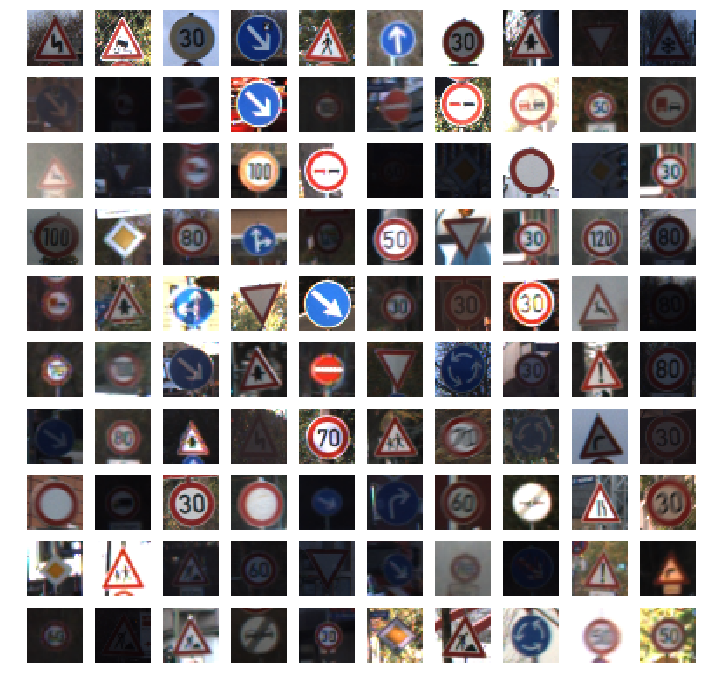

In [6]:
gs = gridspec.GridSpec(10, 10)
gs.update(wspace=0.01, hspace=0.01) 
plt.figure(figsize=(12,12))
for i in range(100):
    ax = plt.subplot(gs[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    index = random.randint(0, len(X_train))
    image = X_train[index]
    plt.subplot(10,10,i+1)
    plt.imshow(image)
    plt.axis('off')
    
plt.show()

In [7]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

8


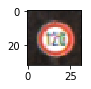

In [8]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

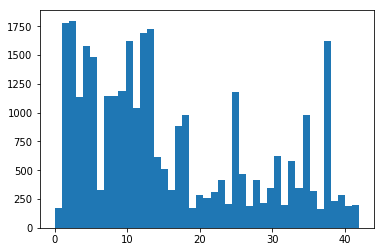

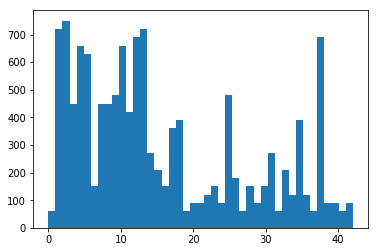

In [9]:
plt.hist(y_train, bins=43)
plt.figure()
plt.hist(y_test,bins=43)


## Preprocess Data

# Generating equal class


   . add tranformed images to balance all dataset
   . transform method : randomly rotate, warp, Histogram Equalization

# Normalization
    
    . Basic steps of Image Processing are applied

# Shuffle data
    
    . To avoid bias.

Shuffle the training data.

You do not need to modify this section.

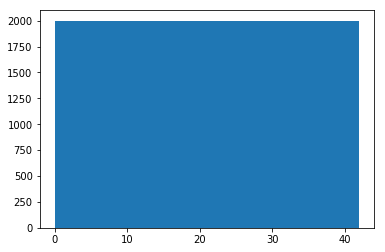

In [11]:
def image_transformation(img,rot,trans):
    
    # Apply rotation
    n_rows, n_cols = img.shape[:2]
    ang_range = np.random.uniform(-rot,rot)
    mat_rot = cv2.getRotationMatrix2D((n_cols/2,n_rows/2), ang_range, 1.0)
    
    # Apply a random translation
    t_x = np.random.uniform(-trans,trans)
    t_y = np.random.uniform(-trans,trans)
    mat_trans = np.float32([[1,0,t_x],[0,1,t_y]])
    
    # Apply Histogram Equalization "CLAHE"
    """It is true the background contrast has improved after histogram equalization. But we may loose information 
       due to over-brightness. It is because histogram is not confined to one particular region.
       
       So to solve this problem, adaptive histogram equalization is use.In this, image is divided into small blocks
       called "tiles". Then each of these blocks are histogram equalized as usual. So in a small area, histogram would 
       confine to a small region.
    """
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # cl1 = clahe.apply(img)
    # clahe.apply() ain;t working error unknown
    # /home/travis/miniconda/conda-bld/work/opencv-3.1.0/modules/imgproc/src/clahe.cpp:354: 
    # error: (-215) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function apply
    img_hist = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(img_hist)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    image = cv2.warpAffine(image,mat_rot,(n_cols,n_rows))
    image = cv2.warpAffine(image,mat_trans,(n_cols,n_rows))
    return image

bin_class = np.bincount(y_train)
for i in range(n_classes):
    new_features, new_labels =[],[]
    features = X_train[np.where(y_train==i)]
    count = 2000-bin_class[i]
    for j in range(count):
        rand_img = np.random.randint(bin_class[i])
        new_features.append(image_transformation(features[rand_img],3,1))
        new_labels.append(i)

    X_train = np.append(X_train, new_features, axis=0)
    y_train = np.append(y_train, new_labels, axis=0)
    
del new_features, new_labels    
    
        


plt.hist(y_train, 43)    
X_train, y_train = shuffle(X_train, y_train)

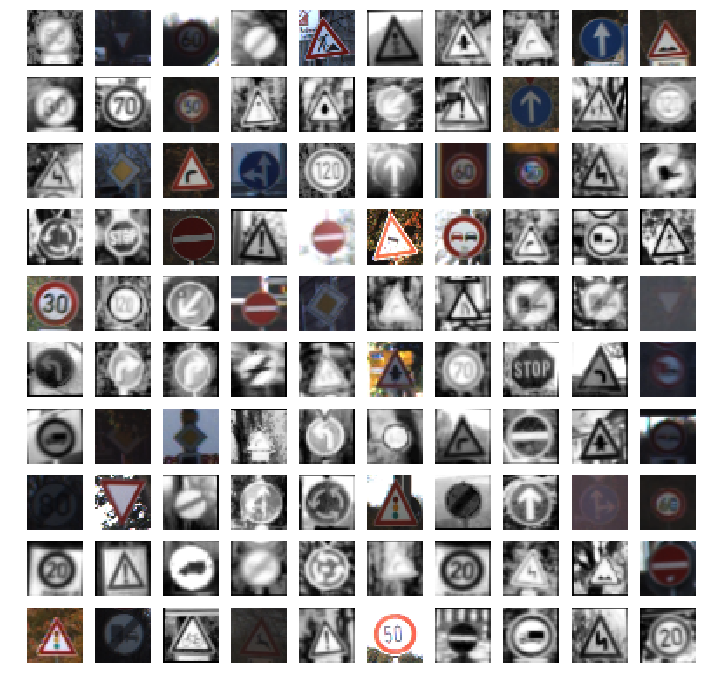

In [12]:
gs = gridspec.GridSpec(10, 10)
gs.update(wspace=0.01, hspace=0.01) 
plt.figure(figsize=(12,12))
for i in range(100):
    ax = plt.subplot(gs[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    index = random.randint(0, len(X_train))
    image = X_train[index]
    plt.subplot(10,10,i+1)
    plt.imshow(image)
    plt.axis('off')
    
plt.show()

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [29]:


EPOCHS = 100
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [30]:


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
   # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 3: Convolutional. Input = 5X5X16. Output=1X1X400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5,5,16,400), mean=mu, stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1,1,1,1], padding='VALID')+conv3_b
    
    # SOLUTION: Activation
    conv3 = tf.nn.relu(conv3)
    
    # SOLUTION: Flatten. Input=1X1X400, output = 400
    fc00 = flatten(conv3)
    
    # SOLUTION: Flatten. Input=conv2, output=400
    fc01 = flatten(conv2)
    
    # concatenate both fc00 and fc01
    fc0 =  tf.concat(1,[fc00,fc01])
    
    # SOLUTION: Layer 4: Fully Connected, Input = 800, Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800,300),mean = mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(300))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Layer 5: Fully Connected, Input = 300, Output = 43
    fc2_W = tf.Variable(tf.truncated_normal(shape=(300,43),mean = mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1,fc2_W) + fc2_b 
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [31]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [32]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



KeyboardInterrupt: 

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))